In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

from keras.preprocessing.text import Tokenizer

In [2]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
df = pd.read_csv('Downloads/matter_sa.csv')


In [4]:
df

,message
0,Nice looking matter bike 👌👌🙏🙏
1,I want to be a dealer...
2,Interested in Dealership
3,Don't buy this bike. I am talking about matter...
4,Please provide details for dealership in Raipu...
...,...
3272,When deliveries will start in lucknow
3273,5000+ model order me
3274,9993249591
3275,"Hi, Urvi! Please let us know how we can help you."


In [5]:
df.describe()

,message
count,3276
unique,3276
top,Nice looking matter bike 👌👌🙏🙏
freq,1


In [6]:
df.message.unique()

array(['Nice looking matter bike 👌👌🙏🙏', 'I want to be a dealer...',
       'Interested in Dealership', ..., '9993249591',
       'Hi, Urvi! Please let us know how we can help you.',
       'I had paid the booking amount till I was not getting confirmation'],
      dtype=object)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  3276 non-null   object
dtypes: object(1)
memory usage: 25.7+ KB


In [9]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
#df['clean_data'] = np.vectorize(remove_pattern)(df['message'], "@[\w]*")

In [10]:
df['message'] = df['message'].astype(str)
df['clean_data'] = np.vectorize(remove_pattern)(df['message'], "@[\w]*")
df

,message,clean_data
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike 👌👌🙏🙏
1,I want to be a dealer...,I want to be a dealer...
2,Interested in Dealership,Interested in Dealership
3,Don't buy this bike. I am talking about matter...,Don't buy this bike. I am talking about matter...
4,Please provide details for dealership in Raipu...,Please provide details for dealership in Raipu...
...,...,...
3272,When deliveries will start in lucknow,When deliveries will start in lucknow
3273,5000+ model order me,5000+ model order me
3274,9993249591,9993249591
3275,"Hi, Urvi! Please let us know how we can help you.","Hi, Urvi! Please let us know how we can help you."


In [11]:
# remove special characters, numbers and punctuations
df['clean_data'] = df['message'].str.replace("[^a-zA-Z#]", " ")
df.tail()

,message,clean_data
3272,When deliveries will start in lucknow,When deliveries will start in lucknow
3273,5000+ model order me,model order me
3274,9993249591,
3275,"Hi, Urvi! Please let us know how we can help you.",Hi Urvi Please let us know how we can help you
3276,I had paid the booking amount till I was not g...,I had paid the booking amount till I was not g...


In [12]:
# remove short words
df['clean_data'] = df['clean_data'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,message,clean_data
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike
1,I want to be a dealer...,want dealer
2,Interested in Dealership,Interested Dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...


In [13]:
# individual words considered as tokens
tokenized_tweet = df['clean_data'].apply(lambda x: x.split())
tokenized_tweet.head()

0                        [Nice, looking, matter, bike]
1                                       [want, dealer]
2                             [Interested, Dealership]
3    [this, bike, talking, about, matter, aera, Rec...
4    [Please, provide, details, dealership, Raipur,...
Name: clean_data, dtype: object

In [14]:
df.describe()

,message,clean_data
count,3277,3277
unique,3277,2785
top,Nice looking matter bike 👌👌🙏🙏,
freq,1,219


In [15]:
#df = df['clean_data'].astype(str)

In [16]:
df.head(5)

,message,clean_data
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike
1,I want to be a dealer...,want dealer
2,Interested in Dealership,Interested Dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...


In [17]:
import nltk
nltk.download('punkt') 
def ngram_extractor(df,ngram_range):
    tokens = word_tokenize(df)
    ngram = ngrams(tokens, ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

list_unigrams = df.clean_data.apply(lambda x : ngram_extractor(x,1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AGL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
cnt

[('bike', 322),
 ('Matter', 291),
 ('matter', 278),
 ('will', 175),
 ('this', 160),
 ('soon', 146),
 ('test', 128),
 ('your', 115),
 ('details', 114),
 ('booking', 113),
 ('have', 106),
 ('When', 104),
 ('that', 102),
 ('Please', 76),
 ('delivery', 73),
 ('from', 73),
 ('want', 71),
 ('available', 71),
 ('price', 71),
 ('start', 68),
 ('with', 67),
 ('experience', 67),
 ('tuned', 65),
 ('India', 62),
 ('book', 61)]

In [19]:
import nltk
nltk.download('stopwords')
def expand_text(df2):
    expanded_text = contractions.fix(df2)
    return expanded_text

stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_d(df2):
    tokens = word_tokenize(df2)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AGL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
clean_text = df.clean_data.apply(expand_text)
clean_text = clean_text.apply(clean_d)

In [21]:
clean_text

0                           [nice, looking, matter, bike]
1                                          [want, dealer]
2                                [interested, dealership]
3       [bike, talking, matter, aera, recently, launch...
4       [please, provide, details, dealership, raipur,...
                              ...                        
3272                         [deliveries, start, lucknow]
3273                                       [model, order]
3274                                                   []
3275                           [urvi, please, know, help]
3276    [paid, booking, amount, till, getting, confirm...
Name: clean_data, Length: 3277, dtype: object

In [22]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('matter', 591),
 ('bike', 354),
 ('soon', 152),
 ('test', 144),
 ('please', 136),
 ('booking', 131),
 ('details', 115),
 ('price', 112),
 ('aera', 110),
 ('delivery', 93),
 ('want', 84),
 ('available', 80),
 ('start', 73),
 ('india', 72),
 ('stay', 70),
 ('book', 69),
 ('experience', 69),
 ('tuned', 65),
 ('booked', 62),
 ('range', 57),
 ('ride', 57),
 ('bookings', 52),
 ('opening', 51),
 ('waiting', 51),
 ('know', 50)]

In [23]:
df

,message,clean_data
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike
1,I want to be a dealer...,want dealer
2,Interested in Dealership,Interested Dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...
...,...,...
3272,When deliveries will start in lucknow,When deliveries will start lucknow
3273,5000+ model order me,model order
3274,9993249591,
3275,"Hi, Urvi! Please let us know how we can help you.",Urvi Please know help


In [24]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))

final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('matter aera', 68),
 ('stay tuned', 65),
 ('test ride', 46),
 ('test bike', 41),
 ('experience centers', 41),
 ('opening soon', 41),
 ('centers opening', 38),
 ('tuned details', 36),
 ('across india', 35),
 ('bookings bike', 31),
 ('test drive', 30),
 ('soon able', 30),
 ('able test', 30),
 ('bike experience', 30),
 ('soon across', 30),
 ('india stay', 30),
 ('purchase details', 29),
 ('details announced', 25),
 ('announced march', 25),
 ('electric bike', 23),
 ('price purchase', 23),
 ('cost matter', 21),
 ('great news', 20),
 ('matter bike', 17),
 ('news bookings', 17)]

In [25]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('experience centers opening', 37),
 ('centers opening soon', 37),
 ('stay tuned details', 36),
 ('soon able test', 30),
 ('able test bike', 30),
 ('test bike experience', 30),
 ('opening soon across', 30),
 ('soon across india', 30),
 ('across india stay', 30),
 ('india stay tuned', 30),
 ('bike experience centers', 27),
 ('purchase details announced', 25),
 ('details announced march', 25),
 ('price purchase details', 23),
 ('cost matter aera', 20),
 ('great news bookings', 17),
 ('news bookings bike', 17),
 ('bookings bike begins', 16),
 ('bike begins soon', 15),
 ('getting closer price', 14),
 ('closer price purchase', 14),
 ('thank patient excited', 12),
 ('patient excited inform', 12),
 ('excited inform bookings', 12),
 ('inform bookings bike', 12)]

In [26]:
from wordcloud import WordCloud

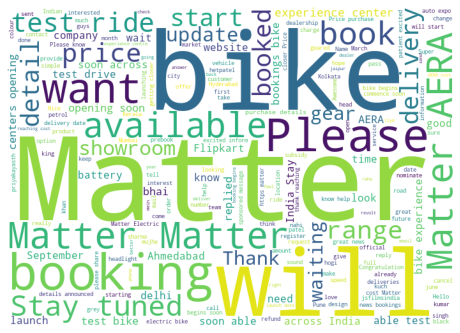

In [27]:
def wordcloud(df,column):
    df_ = df[column].str.cat(sep=' ')
    text = ' '.join([word for word in df_.split()])
    wordcloud = WordCloud(width = 700, height = 500, background_color= 'white').generate(text)
    plt.figure(figsize=(8,14))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud(df,'clean_data')

In [28]:
def yake_extractor(df):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(df)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

keywords = df.clean_data.apply(yake_extractor)
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)

cnt = Counter(all_keywords).most_common(1000)
cnt
  

[('Matter', 254),
 ('bike', 248),
 ('matter', 225),
 ('test', 108),
 ('details', 101),
 ('booking', 92),
 ('price', 62),
 ('Stay tuned', 60),
 ('start', 59),
 ('Stay', 57),
 ('delivery', 55),
 ('India', 54),
 ('experience', 48),
 ('book', 47),
 ('replied', 47),
 ('booked', 45),
 ('bookings', 43),
 ('test bike', 41),
 ('experience centers', 41),
 ('ride', 40),
 ('Price', 39),
 ('centers opening', 38),
 ('experience centers opening', 37),
 ('date', 37),
 ('test ride', 37),
 ('range', 36),
 ('drive', 32),
 ('launch', 31),
 ('bookings bike', 31),
 ('Ahmedabad', 31),
 ('India Stay tuned', 30),
 ('test bike experience', 30),
 ('India Stay', 30),
 ('tuned further details', 30),
 ('bike experience', 30),
 ('showroom', 29),
 ('March', 29),
 ('purchase', 29),
 ('announced', 29),
 ('waiting', 29),
 ('Matter AERA', 29),
 ('September', 29),
 ('begins', 28),
 ('bike experience centers', 27),
 ('great', 27),
 ('opening', 27),
 ('AERA', 27),
 ('Aera', 26),
 ('purchase details', 26),
 ('tuned', 25),
 (

In [29]:
def rake_extractor(df):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(df)
    return keyword_extractor.get_ranked_phrases()
rake_keywords = df.clean_data.apply(rake_extractor)
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('matter', 144),
 ('bike', 37),
 ('details', 33),
 ('march', 20),
 ('range', 15),
 ('september', 14),
 ('want', 13),
 ('booked', 13),
 ('bookings bike shall commence soon', 12),
 ('patient excited inform', 12),
 ('waiting', 11),
 ('price', 9),
 ('start', 9),
 ('booking', 8),
 ('book', 8),
 ('whenyoumetankit', 8),
 ('last sponsored message', 8),
 ('sent', 8),
 ('updates', 7),
 ('speed', 7),
 ('march stay tuned', 7),
 ('help', 7),
 ('congratulations', 7),
 ('nice', 7),
 ('test ride', 6),
 ('available', 6),
 ('matter aeras', 6),
 ('hello', 6),
 ('interest', 6),
 ('nice bike', 6),
 ('aera', 6),
 ('hello help', 6),
 ('matter matter', 6),
 ('experience centers opening soon stay tuned details', 6),
 ('launch date', 6),
 ('launch', 6),
 ('kolkata', 5),
 ('hetpatel', 5),
 ('city', 5),
 ('company', 5),
 ('concerns', 5),
 ('space dropping details soon', 5),
 ('update', 5),
 ('interested dealership', 4),
 ('awesome', 4),
 ('launching', 4),
 ('matter energy', 4),
 ('available kolkata', 4),
 ('star

In [30]:
#preprocessing
# 1. remove spaces,newlines
def remove_spaces(df):
    clean_text = df.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(df):
    expanded_text = contractions.fix(df)
    return expanded_text

# 3.handling accented character
def handling_accented(df):
    fixed_text = unidecode(df)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_dat(df):
    tokens = word_tokenize(df)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 6. lemmatization
def lemmatization(df):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in df :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [31]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
clean_text_train = df.clean_data.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_dat)

clean_text_train = clean_text_train.apply(lemmatization)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AGL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AGL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
clean_text_train

0                                nice looking matter bike
1                                             want dealer
2                                   interested dealership
3       bike talking matter aera recently launched ind...
4       please provide detail dealership raipur chhatt...
                              ...                        
3272                               delivery start lucknow
3273                                          model order
3274                                                     
3275                                urvi please know help
3276        paid booking amount till getting confirmation
Name: clean_data, Length: 3277, dtype: object

In [33]:
df

,message,clean_data
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike
1,I want to be a dealer...,want dealer
2,Interested in Dealership,Interested Dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...
...,...,...
3272,When deliveries will start in lucknow,When deliveries will start lucknow
3273,5000+ model order me,model order
3274,9993249591,
3275,"Hi, Urvi! Please let us know how we can help you.",Urvi Please know help


In [34]:
df['clean_text_train'] = clean_text_train
df

,message,clean_data,clean_text_train
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike,nice looking matter bike
1,I want to be a dealer...,want dealer,want dealer
2,Interested in Dealership,Interested Dealership,interested dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...,bike talking matter aera recently launched ind...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...,please provide detail dealership raipur chhatt...
...,...,...,...
3272,When deliveries will start in lucknow,When deliveries will start lucknow,delivery start lucknow
3273,5000+ model order me,model order,model order
3274,9993249591,,
3275,"Hi, Urvi! Please let us know how we can help you.",Urvi Please know help,urvi please know help


In [35]:
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(df['clean_text_train'])

In [36]:
# Convert to array
vectorized_array = vectorized_data.toarray()

# Convert to DataFrame
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())

In [37]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out())

,aachaaa,aaega,aaer,aafi,aage,aagya,aaiye,aaje,aakash,aakashnayak,...,zigwheels,zindahai,zindgi,zituthakur,ziyadkhanyusufzai,zontes,zuber,zubersiddiqui,zunaid,zuneba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow,columns = count_vect.get_feature_names_out())


,aachaaa,aaega,aaer,aafi,aage,aagya,aaiye,aaje,aakash,aakashnayak,...,zigwheels,zindahai,zindgi,zituthakur,ziyadkhanyusufzai,zontes,zuber,zubersiddiqui,zunaid,zuneba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Word2Vec
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
print(splitted_sent)

[['nice', 'looking', 'matter', 'bike'], ['want', 'dealer'], ['interested', 'dealership'], ['bike', 'talking', 'matter', 'aera', 'recently', 'launched', 'indian', 'gear', 'electric', 'bike', 'booked', 'bike', 'open', 'account', 'could', 'order', 'found', 'cheater', 'back', 'matter', 'matter', 'india', 'revoltmotorsin'], ['please', 'provide', 'detail', 'dealership', 'raipur', 'chhattisgarh'], ['book', 'ksise'], [], ['login', 'mobile', 'number', 'blame', 'simply'], ['good'], ['awesome'], ['test', 'drive', 'hyderabad'], ['pavan', 'kumar', 'damacharla', 'soon', 'able', 'test', 'bike', 'experience', 'center', 'opening', 'soon', 'across', 'india', 'stay', 'tuned', 'detail'], ['greek'], ['venom', 'hope'], ['guess', 'colour', 'give', 'take', 'porcelain', 'grey', 'earth', 'dark', 'grey', 'space', 'deep', 'blue', 'water', 'blue', 'light', 'white', 'fire', 'ether', 'white', 'bright', 'contrast', 'colour', 'sound', 'black', 'thunder', 'yellow', 'matter'], ['name', 'agastya'], [], ['matter', 'ewonde

In [40]:
def vectorizer(list_of_docs, model):
    feature = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew:
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])  # model.wv['bad']
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature


In [41]:
df

,message,clean_data,clean_text_train
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike,nice looking matter bike
1,I want to be a dealer...,want dealer,want dealer
2,Interested in Dealership,Interested Dealership,interested dealership
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...,bike talking matter aera recently launched ind...
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...,please provide detail dealership raipur chhatt...
...,...,...,...
3272,When deliveries will start in lucknow,When deliveries will start lucknow,delivery start lucknow
3273,5000+ model order me,model order,model order
3274,9993249591,,
3275,"Hi, Urvi! Please let us know how we can help you.",Urvi Please know help,urvi please know help


In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
#pip install vaderSentiment


In [45]:
from textblob import TextBlob

In [46]:

from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

df[['polarity', 'subjectivity']] = df['clean_text_train'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

for index, row in df['clean_text_train'].iteritems():
    if isinstance(row, float):
        row = str(row)

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']

    
    if neg > pos:
        df.loc[index, 'sentiment'] = 'Negative'
    elif pos > neg:
        df.loc[index, 'sentiment'] = 'Positive'
    else:
        df.loc[index, 'sentiment'] = 'Neutral'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AGL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
df

,message,clean_data,clean_text_train,polarity,subjectivity,sentiment
0,Nice looking matter bike 👌👌🙏🙏,Nice looking matter bike,nice looking matter bike,0.60,1.00,Positive
1,I want to be a dealer...,want dealer,want dealer,0.00,0.00,Positive
2,Interested in Dealership,Interested Dealership,interested dealership,0.25,0.50,Positive
3,Don't buy this bike. I am talking about matter...,this bike talking about matter aera Recently l...,bike talking matter aera recently launched ind...,0.00,0.25,Positive
4,Please provide details for dealership in Raipu...,Please provide details dealership Raipur Chhat...,please provide detail dealership raipur chhatt...,0.00,0.00,Positive
...,...,...,...,...,...,...
3272,When deliveries will start in lucknow,When deliveries will start lucknow,delivery start lucknow,0.00,0.00,Neutral
3273,5000+ model order me,model order,model order,0.00,0.00,Neutral
3274,9993249591,,,0.00,0.00,Neutral
3275,"Hi, Urvi! Please let us know how we can help you.",Urvi Please know help,urvi please know help,0.00,0.00,Positive


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [50]:
X = df['clean_text_train']
y = df['sentiment']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 4: Perform TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 5: Train a Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [51]:
accuracy = nb_classifier.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9024390243902439


In [52]:
X = df['clean_text_train']  # Input features
y = df['sentiment']  # Target variable

# Preprocessing: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training: Linear Support Vector Classifier (SVC)
model = LinearSVC()
model.fit(X_train_vec,y_train)
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report_str)

Accuracy: 0.9512195121951219
Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.22      0.31         9
     Neutral       0.95      0.99      0.97       435
    Positive       0.97      0.90      0.94       212

    accuracy                           0.95       656
   macro avg       0.81      0.70      0.74       656
weighted avg       0.95      0.95      0.95       656



In [53]:
from sklearn.ensemble import RandomForestClassifier
X = df['clean_text_train']  # Input features
y = df['sentiment']  # Target variable

# Preprocessing: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9496951219512195


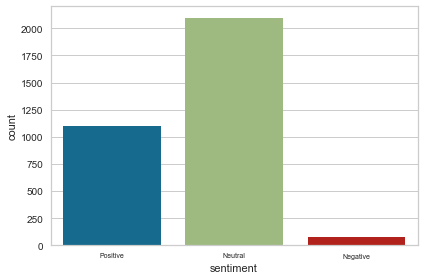

In [56]:
df
ax = sns.countplot(x="sentiment", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [57]:
positive_records = df[df['sentiment'] == 'Positive']

# Display the filtered records
positive_records.value_counts()

message                                                                                clean_data                                                        clean_text_train                                           polarity  subjectivity  sentiment
#Matter #aera                                                                          #Matter #aera                                                     matter aera                                                0.0       0.0           Positive     1
Matter Shoroom Not available in cooch Behar City                                       Matter Shoroom available cooch Behar City                         matter shoroom available cooch behar city                  0.4       0.4           Positive     1
Matter aer 07                                                                          Matter                                                            matter                                                     0.0       0.0           Positive     1
M

In [58]:
positive_records = df[df['sentiment'] == 'Negative']

# Display the filtered records
positive_records.value_counts()

message                                                                                                                                                                                                                                                                                                     clean_data                                                                                                                                                                                                        clean_text_train                                                                                                                                                                               polarity  subjectivity  sentiment
1 am Nokia 32 inch led tv On flipkart But\nReceived Defective Product So i am Create return request for my order but flipkart cancelling my request again and again and giving fake reasonsTV Order No -\nOD327709398240235100 beware guys dont buy Any Product from flip

In [59]:
positive_records = df[df['sentiment'] == 'Neutral']

# Display the filtered records
positive_records.value_counts()

message                                           clean_data                           clean_text_train                polarity  subjectivity  sentiment
"Aeras" 🏍️🏍️🏍️ Future of EVs                      Aeras Future                         aeras future                    0.0       0.125         Neutral      1
Kanpur me shorum kaha hai iska                    Kanpur shorum kaha iska              kanpur shorum kaha iska         0.0       0.000         Neutral      1
Kaha se                                           Kaha                                 kaha                            0.0       0.000         Neutral      1
Kadak                                             Kadak                                kadak                           0.0       0.000         Neutral      1
Kab tak aisa lolipap dikhaoge                     aisa lolipap dikhaoge                aisa lolipap dikhaoge           0.0       0.000         Neutral      1
                                                         

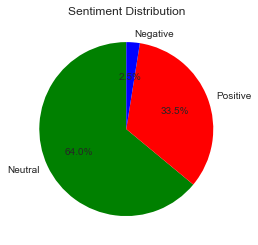

In [60]:
import matplotlib.pyplot as plt

# count the number of reviews with each sentiment
sentiment_counts = df['sentiment'].value_counts()

# create a list of colors for the pie chart
colors = ['green', 'red', 'blue']

# create the pie chart with the sentiment counts
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# add a title to the pie chart
plt.title('Sentiment Distribution')

# display the pie chart
plt.show()